# Capstone Project 2: Data Exploration- iFood Marketing Campaign

Import Libraries

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

Import File to analyze

In [2]:
df = pd.read_csv("ifood_df.csv")

## Problem Statement

* How can iFoods take their recent marketing campaign that had a 15% success ratio and a 46% financial loss and turn it into a marketing campaign that is profitable within the next year? By doing an explorative analysis on the marketing campaign I will be able to identify key customer attributes that correlate to marketing campaign with a probability of  having a 30% acceptance ratio, which would generate almost 20% of profitability from the next campaign.

## Data Cleansing

A Dictionary comes with the csv file.  How does it matchup against the actual columns in the dataframe?

### Dictionary for table columns

- Age - Customer's age
- Education - Customer's education
- Marital_Status - Customer's marital status
- Income - Customer's yearly household income
- Kidhome - # of kids in household
- Teenhome - # of teenagers in household
- Total_Youth_Home - # of kids and teenagers in household
- Recency - # of days since customer's last purchase
- MntWines - Amount spent on wine in the last 2 years
- MntFruits - Amount spent on fruit in the last 2 years
- MntMeatProducts - Amount spent on meat in the last 2 years
- MntFishProducts - Amount spent on fish in the last 2 years
- MntSweetProducts - Amount spent on sweet products in the last 2 years
- MntGoldProds - Amount spent on gold products in the last 2 years
- NumDealsPurchases - # of purchases made with a discount
- NumWebPurchases - # of purchases made on company website
- NumCatalogPurchases - # of purchases made on the catalog
- NumStorePurchases - # of purchase made in store
- NumWebVisitsMonth - # of website visits in the last month
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained within the last 2 years
- Country - Country where the customer is located (not from)

Compare to the columns in the actual dataframe below.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

There is some column editing I want to do. Let's merge Kidhome and Teenhome into one column: 'Total_Youth_Home'. I will remove Z_CostContact and Z_Revenue (provide zero relevant data).  I am going to map and consolidate the 5 marital categories into one: 'Marital_Status'. I will also map and merge the 5 education columns into one: 'Education'. Lastly, we reorganize the columns.

Create a Total_Youth_Home column

In [4]:
dflist = ['Kidhome', 'Teenhome']
df['Total_Youth_Home']= df[dflist].sum(axis=1)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Youth_Home
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


I don't think the AcceptedCmpOverall column is the information I want for my dependant variable. I want my dependant variable to be either 'Response' or the average(mean) of the 6 campaign columns, not the summation. This will give me a better benchmark for what attribute of customers correlate with marketing campaigns turning into sales.

Create 'Marital_Status' column. Together can mean cohabitation and be considered common law marriage so I will categorize both marital_Together and marital_Married as 'Married'.

In [5]:
marital_map = {0:"", 1: "Single"}
df['Single'] = df['marital_Single'].map(marital_map)

marital_map2 = {0:"", 1: "Married"}
df['Married'] = df['marital_Married'].map(marital_map2)

marital_map3 = {0:"", 1:"Divorced"}
df['Divorced'] = df['marital_Divorced'].map(marital_map3)

marital_map4 = {0:"", 1:"Widow"}
df['Widow'] = df['marital_Widow'].map(marital_map4)

marital_map5 = {0:"", 1:"Married"}
df['Together'] = df['marital_Together'].map(marital_map5)

df['Marital_Status'] = df['Single'] + df['Married'] + df['Divorced'] + df['Widow'] + df['Together']

Let's do the same thing with Education that we did with Marital_Status. It appears that 2nd level education is comprable to Masters degree so we will categorize both as 'Masters'.

In [6]:
education_map = {0:"", 1:"Basic"}
df['Basic'] = df['education_Basic'].map(education_map)

education_map2 = {0:"", 1: "Bachelors"}
df['Bachelors'] = df['education_Graduation'].map(education_map2)

education_map3 = { 0:"", 1:"Masters"}
df['Masters'] = df['education_Master'].map(education_map3)
df['2n_Cycle'] = df['education_2n Cycle'].map(education_map3)

education_map4 = {0:"", 1: "PhD"}
df['PhD'] = df['education_PhD'].map(education_map4)

df['Education'] = df['Basic'] + df['Bachelors'] + df['Masters'] + df['2n_Cycle'] + df['PhD']

In [49]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Total_Youth_Home', 'Single', 'Married',
       'Divorced', 'Widow', 'Together', 'Marital_Status', 'Basic', 'Bachelors',
       'Masters', '2n_Cycle', 'PhD', 'Education'],
      dtype='object')

In [7]:
new_columns = ['Income', 'Total_Youth_Home', 'Marital_Status', 'Education','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'AcceptedCmpOverall', 'Complain',
       'Age', 'Customer_Days']
df = df[new_columns]
df.head()

,Income,Total_Youth_Home,Marital_Status,Education,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,AcceptedCmpOverall,Complain,Age,Customer_Days
0,58138.0,0,Single,Bachelors,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0,0,63,2822
1,46344.0,2,Single,Bachelors,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,66,2272
2,71613.0,0,Married,Bachelors,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,55,2471
3,26646.0,1,Married,Bachelors,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,36,2298
4,58293.0,1,Married,PhD,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,39,2320


Let's create some visualizations with box plots of the numerical variables and check for concerning outliers. 

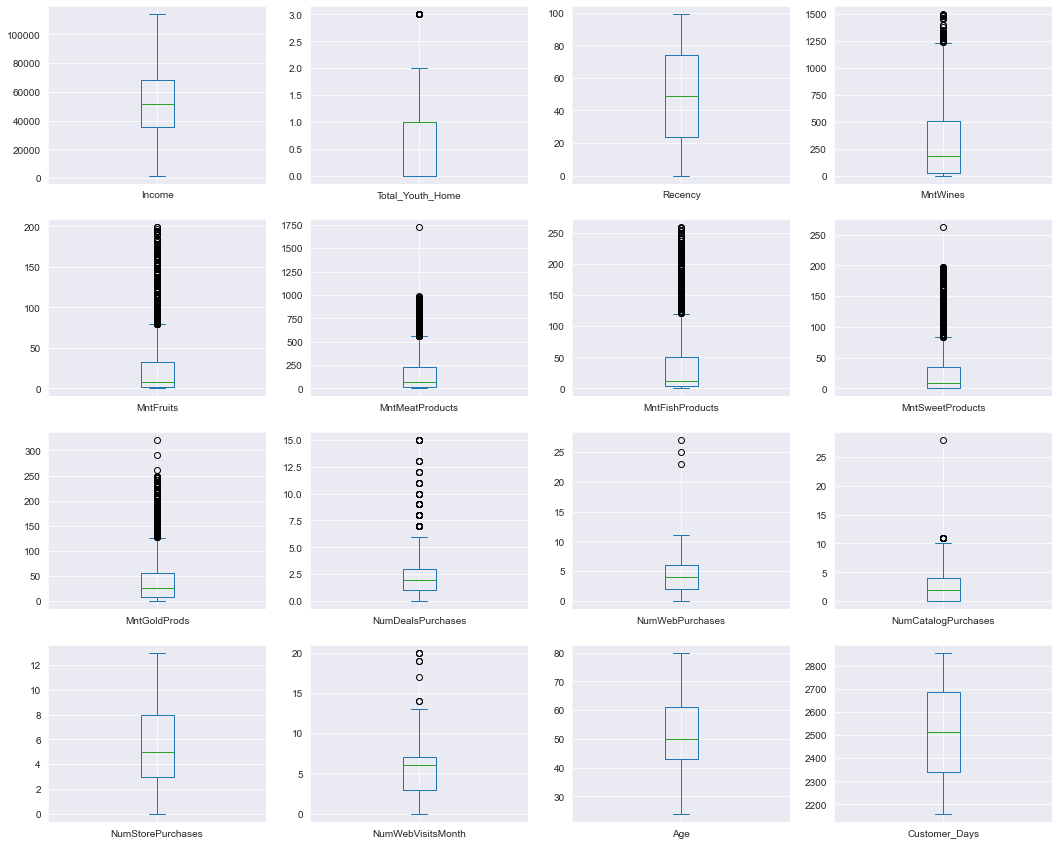

In [8]:
numeric_vars = df.select_dtypes(include=['number']).columns
numeric_vars = numeric_vars.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'Response', 'Complain', 'AcceptedCmpOverall'])
df[numeric_vars].plot(subplots=True, layout=(4,4), kind='box', figsize=(18,15))

plt.show()

When looking at these box plots I don't see any outliers that I think need to be scrubbed from the data.

In [9]:
df.shape

(2205, 26)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Total_Youth_Home     2205 non-null   int64  
 2   Marital_Status       2205 non-null   object 
 3   Education            2205 non-null   object 
 4   Recency              2205 non-null   int64  
 5   MntWines             2205 non-null   int64  
 6   MntFruits            2205 non-null   int64  
 7   MntMeatProducts      2205 non-null   int64  
 8   MntFishProducts      2205 non-null   int64  
 9   MntSweetProducts     2205 non-null   int64  
 10  MntGoldProds         2205 non-null   int64  
 11  NumDealsPurchases    2205 non-null   int64  
 12  NumWebPurchases      2205 non-null   int64  
 13  NumCatalogPurchases  2205 non-null   int64  
 14  NumStorePurchases    2205 non-null   int64  
 15  NumWebVisitsMonth    2205 non-null   i

Check to see if there is any null values.

In [11]:
df.isnull().sum()

Income                 0
Total_Youth_Home       0
Marital_Status         0
Education              0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
AcceptedCmpOverall     0
Complain               0
Age                    0
Customer_Days          0
dtype: int64

Lets see if there are any duplicate rows in the dataframe.

In [12]:
print(df.shape)
print(df.duplicated().sum())

(2205, 26)
184


In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.shape

(2021, 26)

In [15]:
df.to_csv('/Users/adamreed/Desktop/Data Analyics Career Track/Capstone 2/Marketing Food/iFood_df2.csv')


No spaces are in column headers and there appear to be zero null datapoints. We found 184 rows of duplicate information that we removed from the dataframe. You can see the size of the rows in df.shape went from 2205 to 2021.

The data is as clean as it can be to start exploring.

## Exploratory Analysis

Firstly, how many customers out of the 2021 customers surveyed accepted each campaign?

In [16]:
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

AcceptedCmp1    133
AcceptedCmp2     26
AcceptedCmp3    151
AcceptedCmp4    155
AcceptedCmp5    146
Response        311
dtype: int64

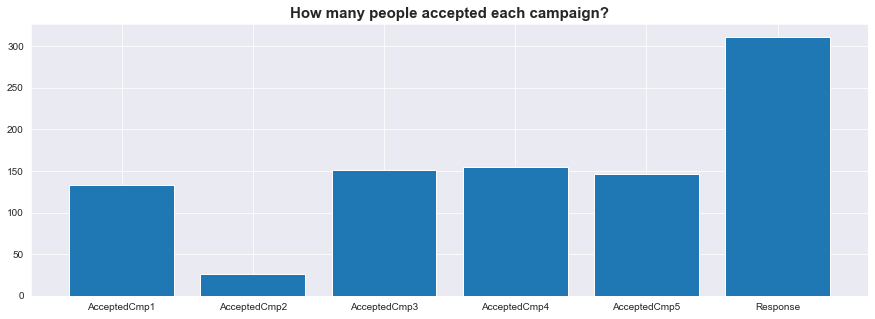

In [17]:
acceptance_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
fig = plt.figure(figsize=(15,5))
plt.bar(x=acceptance_cols,
        height=df[acceptance_cols].sum())

plt.title("How many people accepted each campaign?", fontdict={'fontsize':15,'fontweight':'bold'})

plt.show()

#### Marriage, Education

* How do these two categories align and diverge between income, product spend and campaign acceptance.

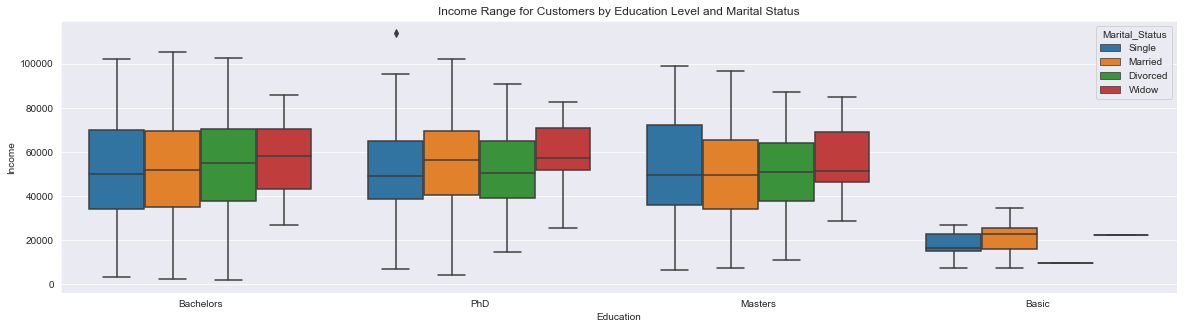

In [18]:
sns.boxplot(x='Education', y='Income', hue='Marital_Status',data=df)
plt.title("Income Range for Customers by Education Level and Marital Status")
plt.show()

The boxplot highlights that most of our customer base is more highly educated than a basic high school degree. There is not a huge variance in income levels by Marital Status between Bachelor's, Master's and PhD education levels.

In [23]:
df['Education'].value_counts()

Bachelors    1015
Masters       518
PhD           439
Basic          49
Name: Education, dtype: int64

In [24]:
df['Marital_Status'].value_counts()

Married     1294
Single       443
Divorced     214
Widow         70
Name: Marital_Status, dtype: int64

Our value Counts show our biggest purchasing customer segments from marital status and education columns are Married people and people with Bachelors degrees.  Where are they spending their monies?

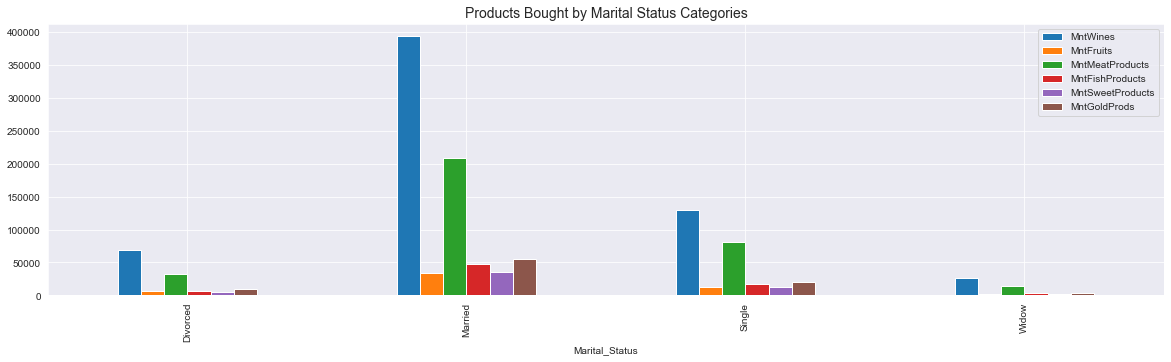

In [19]:
prod_by_marital= df.groupby(['Marital_Status'])[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

prod_by_marital.sort_values(by=['Marital_Status']).plot(kind='bar')
plt.title("Products Bought by Marital Status Categories", fontdict={'fontsize':14})
plt.show()

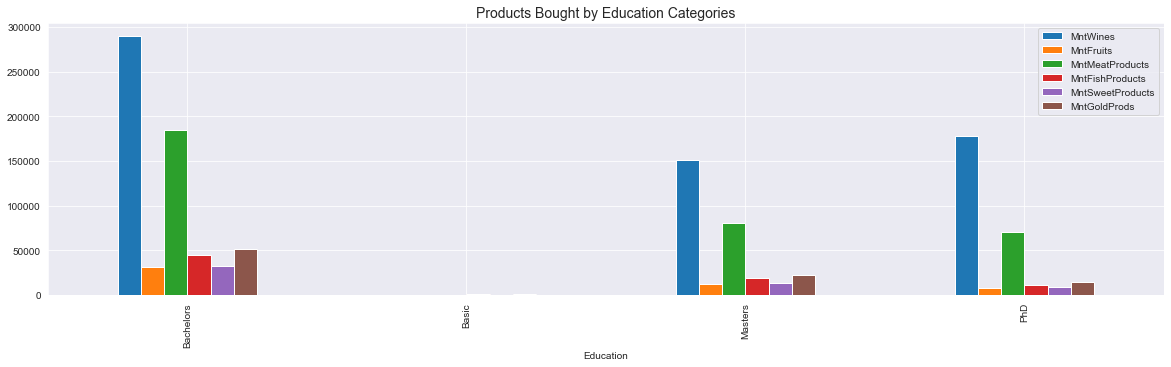

In [20]:
avg_product_amt_bought_education= df.groupby(['Education'])[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum()
avg_product_amt_bought_education.sort_values(by=['Education']).plot(kind='bar')
plt.title("Products Bought by Education Categories", fontdict={'fontsize':14})
plt.show()

We can see in the above two bar graphs that Wines and Meats are the two most purchased categories amongst all categories both Marrital_Status and Education.

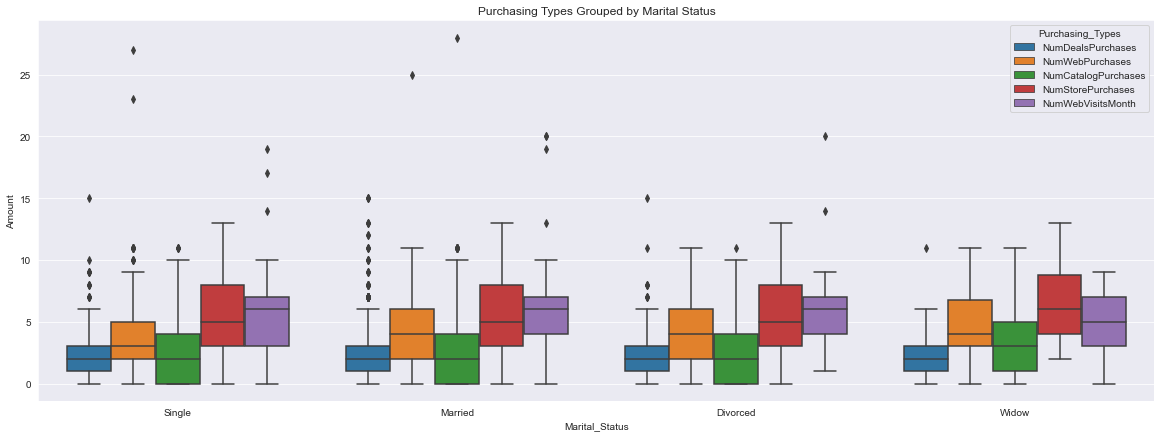

In [21]:
purchasing = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth']
df00 = pd.melt(df, id_vars='Marital_Status', value_vars=purchasing, var_name='Purchasing_Types', value_name='Amount')

plt.figure(figsize=(20,7))
sns.boxplot(x='Marital_Status', y='Amount', hue='Purchasing_Types', data=df00)
plt.title("Purchasing Types Grouped by Marital Status")
plt.show()

Above we can see where the Marital Status column is going to spend its monies.  Across the board most purchases are done in store with web purchases being the scond most used avenue for purchasing.

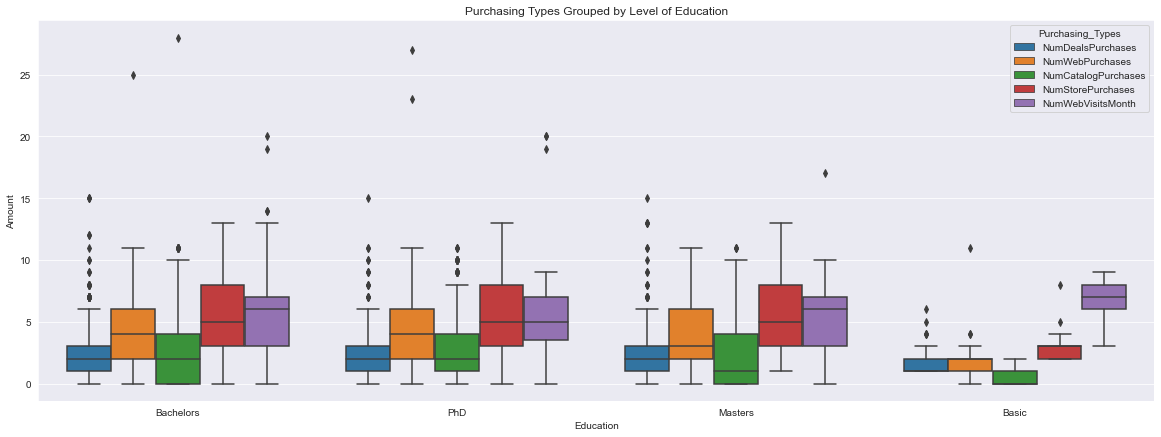

In [22]:
purchasing = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth']
df11 = pd.melt(df, id_vars='Education', value_vars=purchasing, var_name='Purchasing_Types', value_name='Amount')

plt.figure(figsize=(20,7))
sns.boxplot(x='Education', y='Amount', hue='Purchasing_Types', data=df11)
plt.title("Purchasing Types Grouped by Level of Education")
plt.show()

When seeing how Education patterns make their purchases it is incredibly similar to Marital Status.  Most go in store to spend their monies with web purchases being the second most used avenue for making purchases.

In the below kernel I am going to melt the dataframe around Marital Status and Education columns. This will allow me to split Campaign and the customers who accepted each Campaign into different columns. I can then count between Marital Status and Education and notice any variance that might be insightful.

In [30]:
campaign = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
df1 = pd.melt(df, id_vars=['Marital_Status', 'Education'], value_vars=campaign, var_name='Campaign', value_name = 'Acceptance')
print(df1.head(3))

  Marital_Status  Education      Campaign  Acceptance
0         Single  Bachelors  AcceptedCmp1           0
1         Single  Bachelors  AcceptedCmp1           0
2        Married  Bachelors  AcceptedCmp1           0


First, what are the total counts of Marrital Status in dataframe and Marital Status acceptances in each campaign?

In [67]:
df.Marital_Status.value_counts().index

Index(['Married', 'Single', 'Divorced', 'Widow'], dtype='object')

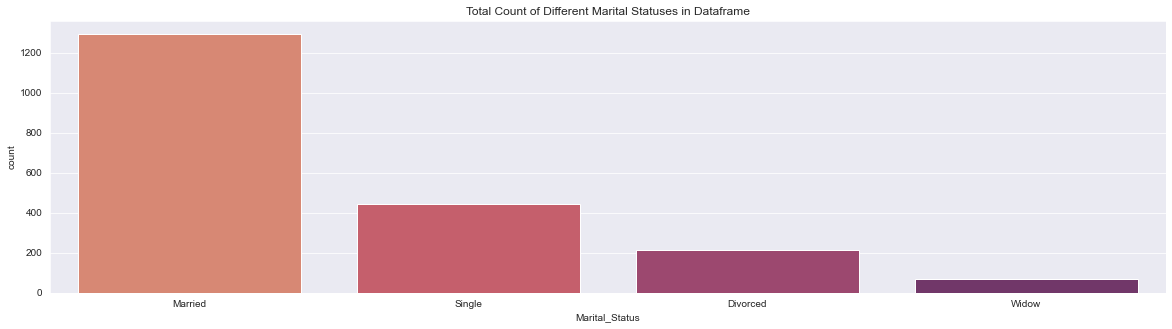

In [68]:
sns.countplot(x='Marital_Status', data= df, palette='flare', order=df.Marital_Status.value_counts().index)
plt.title("Total Count of Different Marital Statuses in Dataframe")
plt.show()

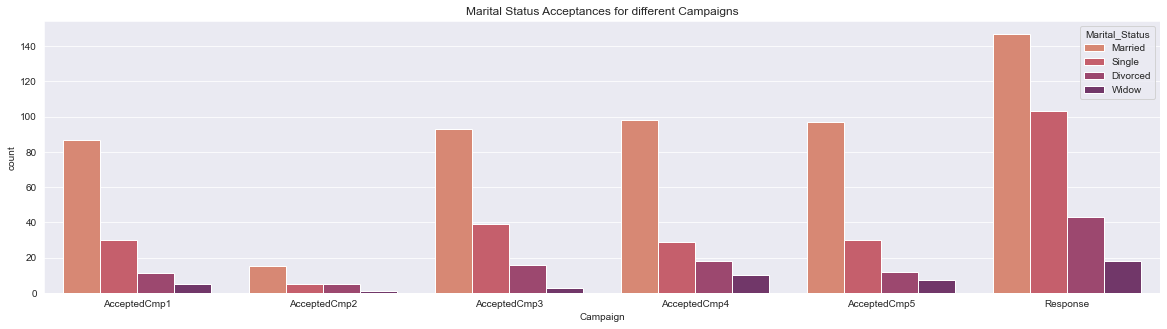

In [69]:
condition_1 = df1['Acceptance']== 1
df_con_1 = df1[condition_1]

sns.countplot(x='Campaign', data= df_con_1, hue='Marital_Status', palette='flare', hue_order=['Married', 'Single', 'Divorced', 'Widow'])
plt.title("Marital Status Acceptances for different Campaigns")
plt.show()

Looking at the two above charts we can see that Married people are 3 times the size of Single people in the dataframe and that ratio follows suit through acceptance of campaigns 1,2,4 and 5.  It is very noitceable that Single people were drawn to Campaign 6(Response) at a higher clip than any other Marital Status category. Almost 1 out of every 4 Single customers in the dataframe accepted Campaign 6. Future campaigns with the type of product  Campaign 6 was selling should be focused more heavily on Single customers.

In [70]:
df.Education.value_counts().index

Index(['Bachelors', 'Masters', 'PhD', 'Basic'], dtype='object')

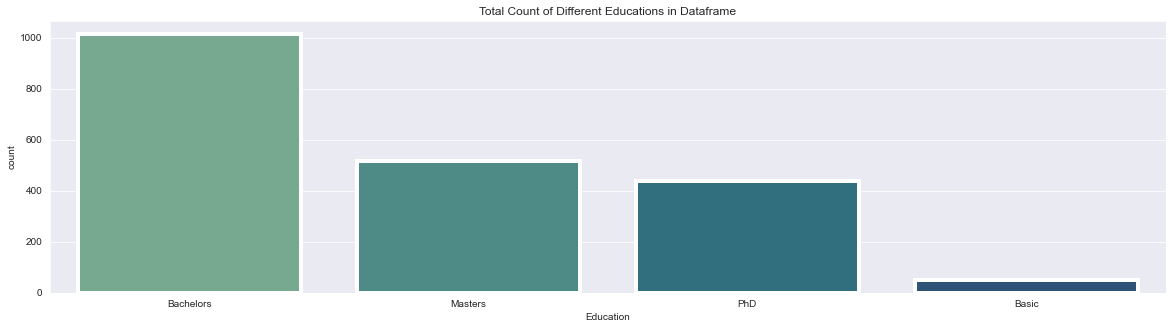

In [71]:
sns.countplot(x='Education', data= df, palette='crest', lw=4, order=df.Education.value_counts().index)
plt.title("Total Count of Different Educations in Dataframe")
plt.show()

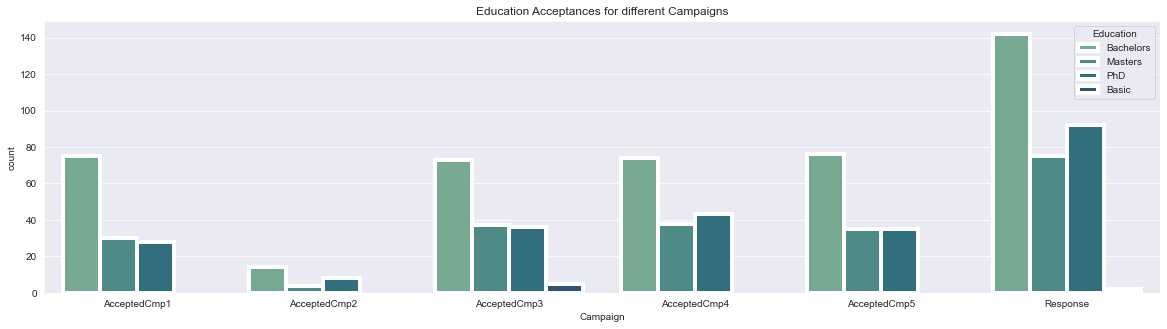

In [72]:
condition_2 = df1['Acceptance']== 1
df_con_2 = df1[condition_2]

sns.countplot(x='Campaign', data= df_con_2, hue='Education', palette='crest', lw=4, hue_order=['Bachelors', 'Masters', 'PhD', 'Basic'])
plt.title("Education Acceptances for different Campaigns")
plt.show()

As seen above, I replicated the same approach for Education as for Marital Status. It is very noitceable that PhDs were drawn to Campaign 6(Response) at a higher clip than any other Education category. Almost 1 out of every 5 PhD customers in the dataframe accepted Campaign 6. Future campaigns with the type of product  Campaign 6 was selling should be focused more heavily on PhD customers.

In [ ]:
So, let's dive deeper into the Single and PhD Acceptance to Campaign 6.

In [23]:
dfAA = df.loc[(df['Marital_Status']== 'Single') & (df['Education']== 'PhD'), ['Marital_Status', 'Education']]

print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())
print(dfAA.value_counts())
print("")
print("*There are 698 customers who have either a PhD or are Single.  There are 92 Single customer with a PhD*")

Married     1294
Single       443
Divorced     214
Widow         70
Name: Marital_Status, dtype: int64
Bachelors    1015
Masters       518
PhD           439
Basic          49
Name: Education, dtype: int64
Marital_Status  Education
Single          PhD          92
dtype: int64

*There are 698 customers who have either a PhD or are Single.  There are 92 Single customer with a PhD*


In [78]:
dfBB = df.loc[(df['Response']== 1) & (df['Marital_Status']== 'Single') & (df['Education']== 'PhD'), ['Marital_Status', 'Education', 'Response']]
print(dfBB.value_counts())

Marital_Status  Education  Response
Single          PhD        1           28
dtype: int64


* Targeting PhD and Single customers would bump up the acceptance rate for the type of product offered in Campaign 6 from 15% to over 20%.
* Targeting Single customers with PhDs would have resulted in a (28÷92) 30% acceptance rate for Campaign 6.

#### Dependant Trends

* Does the amount of total products bought vary between the number of dependents a customer has?
* How do the acceptance rates of campaigns vary among the amount of youth at home?
* Does the type of purchase vary between the number of dependents a customer has?

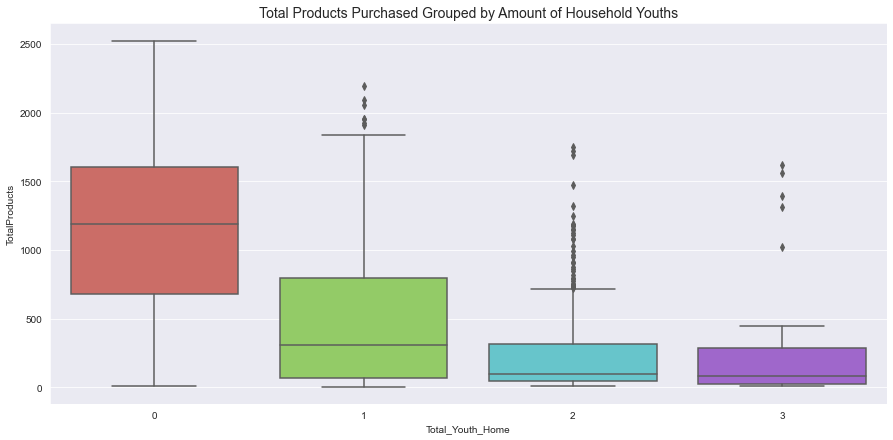

In [24]:
df['TotalProducts'] = df[['MntWines', 'MntFruits','MntMeatProducts', 
                              'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)
plt.figure(figsize=(15,7))
sns.boxplot(x='Total_Youth_Home', y='TotalProducts', data=df, palette='hls')
plt.title("Total Products Purchased Grouped by Amount of Household Youths", fontdict={'fontsize':14})
plt.show()

As we can see above, the total number of products purchased decreases with the more dependants a home has.

Text(0.5, 1.0, 'Dataframe Broken Down by Youths at Home')

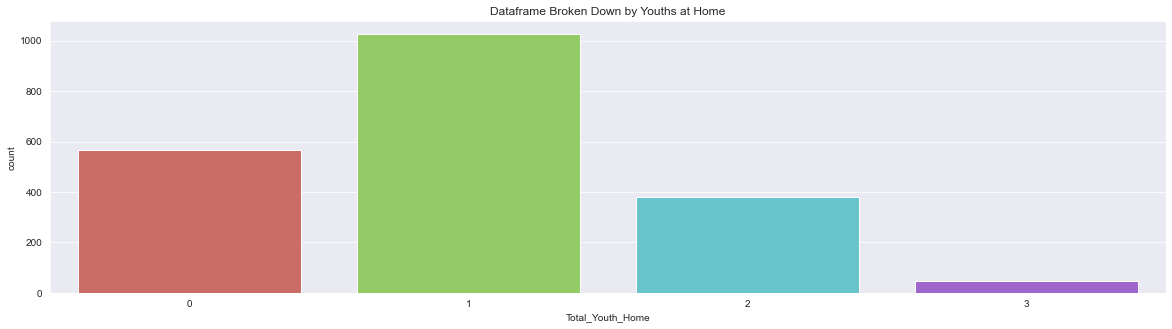

In [25]:
sns.countplot(x='Total_Youth_Home', data=df, palette='hls')
plt.title("Dataframe Broken Down by Youths at Home")

The two charts above highlight a major divergance.  Almost 50% of our customers have only 1 child at home, but the median of products purchased for customers with 0 children at home is 3x that of homes with 1 child.

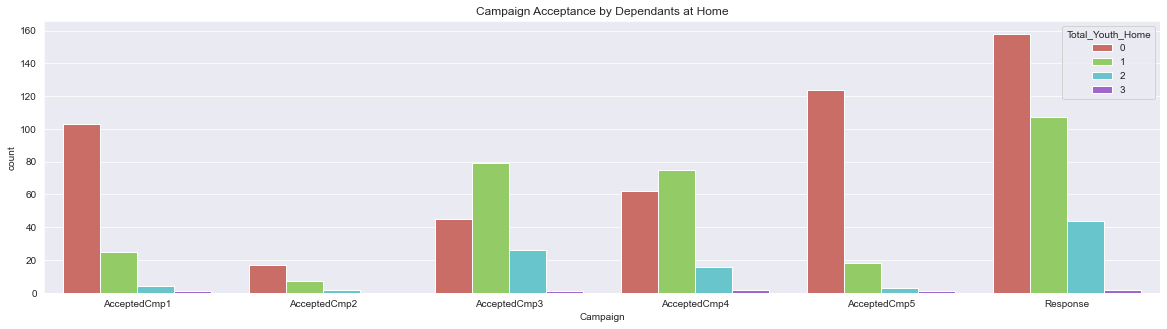

In [30]:
campaign = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response', 'AvgAcceptedCmp']
dfBB = pd.melt(df, id_vars=['Total_Youth_Home'], value_vars=campaign, var_name='Campaign', value_name = 'Acceptance')

condition_6 = dfBB['Acceptance']== 1
dfCC = dfBB[condition_6]

sns.countplot(x='Campaign', data= dfCC, hue='Total_Youth_Home', palette='hls')
plt.title("Campaign Acceptance by Dependants at Home")
plt.show()

Well the above graph is truly an eye opener.  If campaign 1 focused on households with 0 youth at home the accptance rate woulf have jumped from 6.5% to 17.5%.  Campaign 5 would have jumped frpm 7.2% to 21%.  And Campaign 6 would have risen from 15% to 27%.  

In [79]:
purchasing = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth']
df2 = pd.melt(df, id_vars='Total_Youth_Home', value_vars=purchasing, var_name='Purchasing_Types', value_name='Amount')
print(df2.head(3))

   Total_Youth_Home   Purchasing_Types  Amount
0                 0  NumDealsPurchases       3
1                 2  NumDealsPurchases       2
2                 0  NumDealsPurchases       1


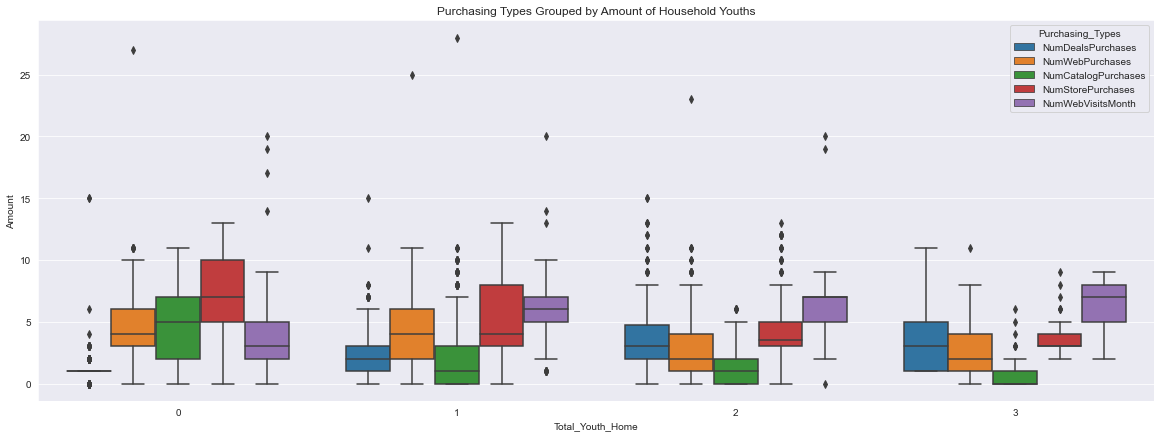

In [80]:
plt.figure(figsize=(20,7))
sns.boxplot(x='Total_Youth_Home', y='Amount', hue='Purchasing_Types', data=df2)
plt.title("Purchasing Types Grouped by Amount of Household Youths")
plt.show()

Observations from the 5 boxplots above:
* Total Product purchases decreases dramatically from zero to 3 dependants. Zero Dependants make up the lions share of pproducts purchased
* Catalog, Store and Web purchases  decline from zero to 3 depandants.
* Web visits on the other hand increase from zero to 3 dependants. 
* Deals purchased rise dramatically from zero to 3 dependants.

What is the acceptance rate of the 6 campaigns (Response is actually the last campaign), their total and their average?

In [26]:
df[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'AcceptedCmpOverall']].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,0.065809,0.012865,0.074715,0.076695,0.072241,0.153884,0.302326
std,0.248009,0.112720,0.262997,0.266172,0.258951,0.360927,0.680812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


The last campaign ('Response' column) is the 15% acceptance rate mentioned in the Problem Statement.

The first 5 campaigns had a very low success rate compared to the Response column. Its tough to nail down why customers were accepting of certain campaigns and not of others. 

Maybe correlating the dataframe can provide some additional info.

In [27]:
df.corr()

,Income,Total_Youth_Home,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,AcceptedCmpOverall,Complain,Age,Customer_Days,TotalProducts
Income,1.000000,-0.356096,0.001105,0.724708,0.535848,0.697477,0.549806,0.552832,0.407378,-0.135717,0.495144,0.705481,0.684358,-0.643992,0.347445,0.108958,-0.012205,0.226665,0.414748,0.175167,0.386264,-0.026644,0.216372,-0.018110,0.819310
Total_Youth_Home,-0.356096,1.000000,0.029236,-0.361155,-0.399890,-0.515895,-0.426083,-0.391206,-0.265939,0.437949,-0.162898,-0.456710,-0.335870,0.408092,-0.242777,-0.081100,-0.024981,-0.086533,-0.287322,-0.175340,-0.254634,0.026760,0.087014,-0.029163,-0.505746
Recency,0.001105,0.029236,1.000000,0.011484,-0.012252,0.016184,-0.001318,0.023051,0.011669,0.009301,-0.005093,0.018353,-0.000854,-0.011966,-0.025865,-0.009087,-0.033744,0.021938,-0.003143,-0.203954,-0.016580,-0.001016,0.013426,0.032079,0.014006
MntWines,0.724708,-0.361155,0.011484,1.000000,0.382979,0.587013,0.391603,0.382027,0.388793,0.016442,0.547999,0.667444,0.635343,-0.320189,0.353909,0.199833,0.062512,0.360534,0.465395,0.237115,0.504129,-0.035294,0.171150,0.173372,0.895382
MntFruits,0.535848,-0.399890,-0.012252,0.382979,1.000000,0.567547,0.590591,0.559035,0.397650,-0.138933,0.295250,0.513863,0.453758,-0.416852,0.202663,-0.005463,0.011354,0.010029,0.211462,0.127641,0.161660,0.000009,0.023635,0.079331,0.614328
MntMeatProducts,0.697477,-0.515895,0.016184,0.587013,0.567547,1.000000,0.591345,0.550626,0.369275,-0.162961,0.322937,0.711143,0.511026,-0.534085,0.332420,0.048808,0.021137,0.083345,0.387075,0.250962,0.317153,-0.019014,0.046786,0.093096,0.855016
MntFishProducts,0.549806,-0.426083,-0.001318,0.391603,0.590591,0.591345,1.000000,0.582989,0.423038,-0.141935,0.294885,0.558567,0.460480,-0.445388,0.265955,0.002825,-0.011836,0.007875,0.187540,0.102379,0.167190,-0.016861,0.043250,0.090133,0.641951
MntSweetProducts,0.552832,-0.391206,0.023051,0.382027,0.559035,0.550626,0.582989,1.000000,0.360066,-0.120516,0.327708,0.519824,0.451245,-0.419501,0.253224,0.012889,-0.008900,0.027439,0.254365,0.116769,0.198419,-0.019010,0.025113,0.092455,0.605018
MntGoldProds,0.407378,-0.265939,0.011669,0.388793,0.397650,0.369275,0.423038,0.360066,1.000000,0.064246,0.407874,0.468126,0.382198,-0.235646,0.165680,0.059577,0.133925,0.018359,0.170258,0.154452,0.193890,-0.028533,0.051646,0.175949,0.528119
NumDealsPurchases,-0.135717,0.437949,0.009301,0.016442,-0.138933,-0.162961,-0.141935,-0.120516,0.064246,1.000000,0.243263,-0.049526,0.068607,0.363911,-0.133821,-0.036153,-0.021715,0.024413,-0.186031,-0.000464,-0.124337,0.001976,0.064622,0.220804,-0.075178


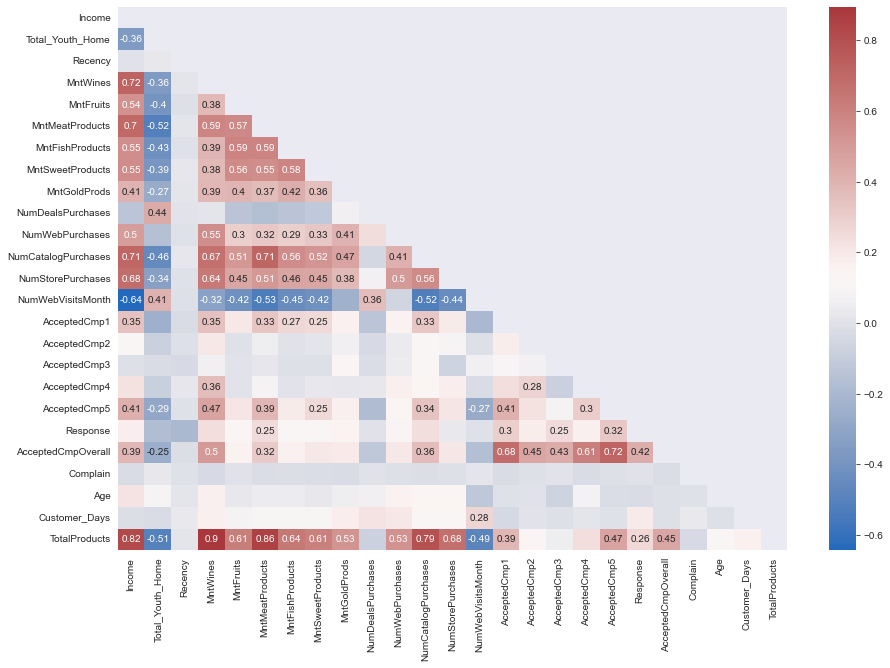

In [28]:
fig = plt.figure(figsize=(15,10))

corr = df.corr()

matrix = np.triu(corr)
ax = sns.heatmap(corr, cmap = 'vlag',annot=True, mask = matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.25:
        t.set_text(t.get_text())
    else:
        t.set_text(" ")

#### Correlation Insights

* The Response (campaign 6) column is mostly correlated to Meat Products. 

* I Find it interesting that Campaign 5 has stronger correlations with more numeric variables than Response, but has a lower acceptance rate. 

* Recency, Complain, Age and Customer_Days have very little correlation to any part of the dataframe. 

#### Income

Income has a high correlation to Campaign5 and Campaign1.  Let's explore. 

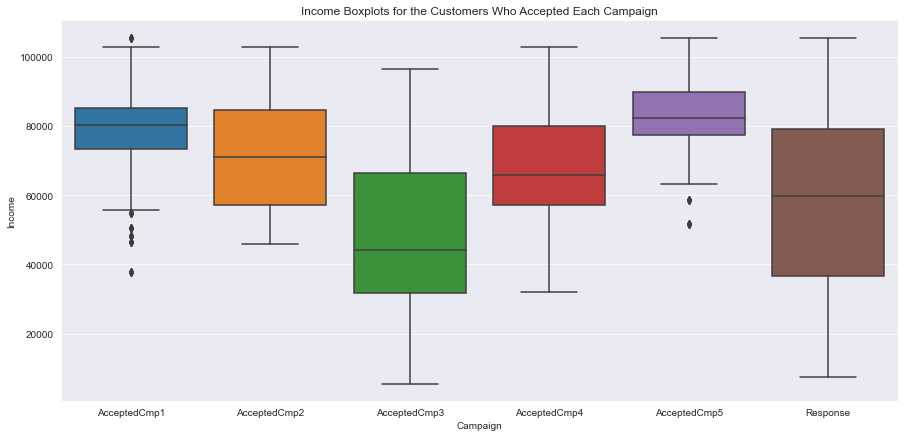

In [31]:
df3 = pd.melt(df, id_vars=['Income'], value_vars=campaign, var_name='Campaign', value_name = 'Acceptance')

accepted_cmp_df = df3[df3['Acceptance']==1]
income_df = df3[['Income']]

cmp_v_income = accepted_cmp_df.merge(income_df, how='inner', left_on='Income', right_on='Income').sort_values('Campaign')

plt.figure(figsize=(15,7))
sns.boxplot(x='Campaign', y='Income', data=cmp_v_income)
plt.title("Income Boxplots for the Customers Who Accepted Each Campaign")

plt.show()

Campaign 1 and 5s purchasers IQR are both very close.  Campaign1 IQR is in between 73,000 and 85,000 for income. Campaign5 IQR is in between 78,000 and 90,000 for income.  The type of product for this campaign should definietly be targeting consumers in between this IQR range.

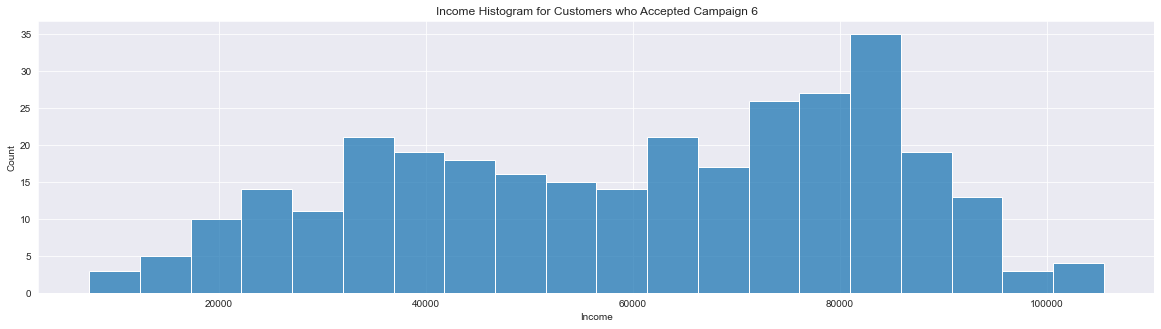

In [32]:
campaign1 = ['Response']
dfII = pd.melt(df, id_vars=['Income'], value_vars=campaign1, var_name='Campaign', value_name = 'Acceptance')

condition_7 = dfII['Acceptance']== 1
dfHH = dfII[condition_7]

sns.histplot(x='Income', data=dfHH, bins= 20)
plt.title("Income Histogram for Customers who Accepted Campaign 6")
plt.show()

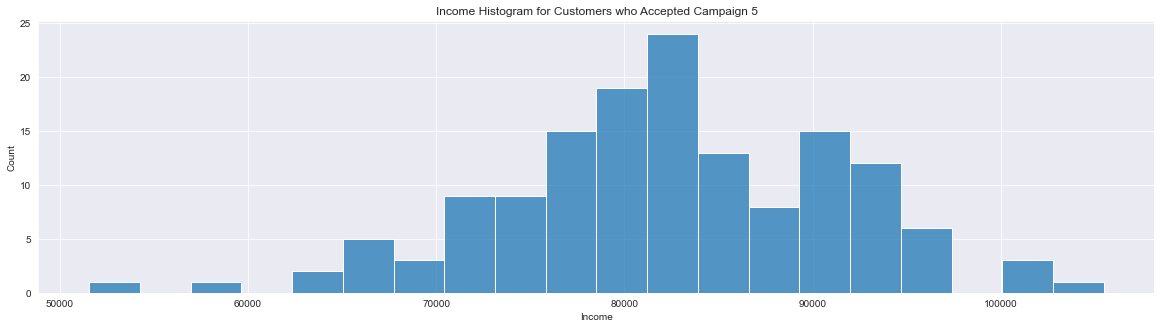

In [50]:
campaign1 = ['AcceptedCmp5']
dfII = pd.melt(df, id_vars=['Income'], value_vars=campaign1, var_name='Campaign', value_name = 'Acceptance')

condition_7 = dfII['Acceptance']== 1
dfHH = dfII[condition_7]

sns.histplot(x='Income', data=dfHH, bins= 20)
plt.title("Income Histogram for Customers who Accepted Campaign 5")
plt.show()

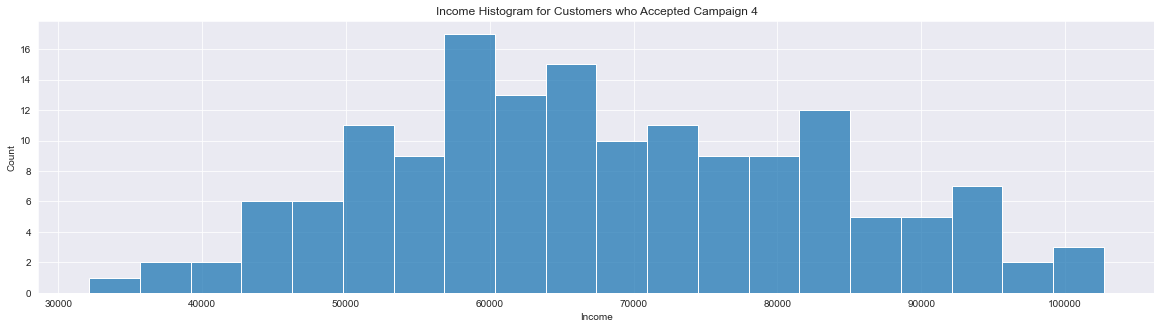

In [318]:
campaign1 = ['AcceptedCmp4']
dfII = pd.melt(df, id_vars=['Income'], value_vars=campaign1, var_name='Campaign', value_name = 'Acceptance')

condition_7 = dfII['Acceptance']== 1
dfHH = dfII[condition_7]

sns.histplot(x='Income', data=dfHH, bins= 20)
plt.title("Income Histogram for Customers who Accepted Campaign 4")
plt.show()

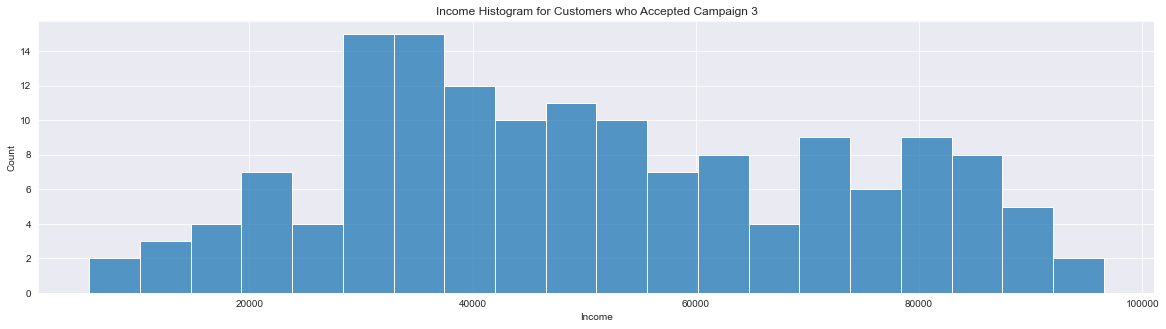

In [319]:
campaign1 = ['AcceptedCmp3']
dfII = pd.melt(df, id_vars=['Income'], value_vars=campaign1, var_name='Campaign', value_name = 'Acceptance')

condition_7 = dfII['Acceptance']== 1
dfHH = dfII[condition_7]

sns.histplot(x='Income', data=dfHH, bins= 20)
plt.title("Income Histogram for Customers who Accepted Campaign 3")
plt.show()

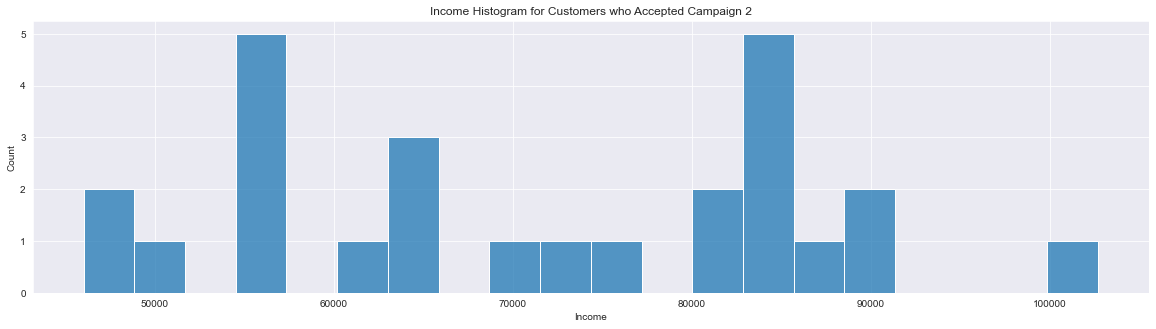

In [320]:
campaign1 = ['AcceptedCmp2']
dfII = pd.melt(df, id_vars=['Income'], value_vars=campaign1, var_name='Campaign', value_name = 'Acceptance')

condition_7 = dfII['Acceptance']== 1
dfHH = dfII[condition_7]

sns.histplot(x='Income', data=dfHH, bins= 20)
plt.title("Income Histogram for Customers who Accepted Campaign 2")
plt.show()

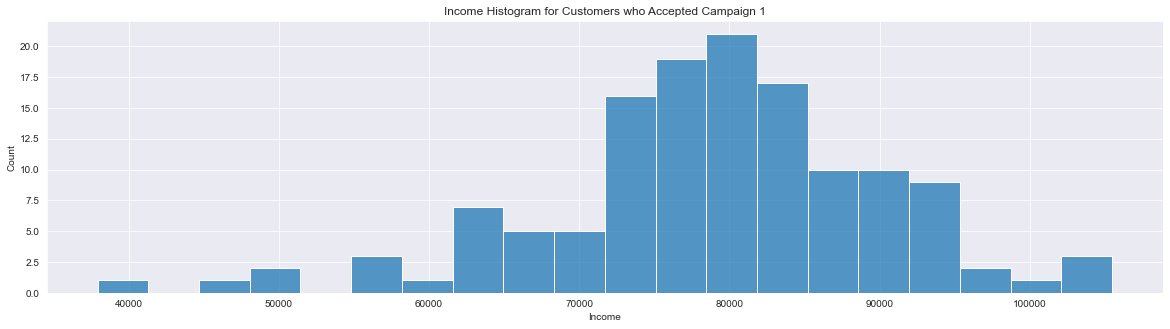

In [321]:
campaign1 = ['AcceptedCmp1']
dfII = pd.melt(df, id_vars=['Income'], value_vars=campaign1, var_name='Campaign', value_name = 'Acceptance')

condition_7 = dfII['Acceptance']== 1
dfHH = dfII[condition_7]

sns.histplot(x='Income', data=dfHH, bins= 20)
plt.title("Income Histogram for Customers who Accepted Campaign 1")
plt.show()

I think future campaigns with products similar to the 6 campaigns in this dataframe can look to also guide their target customer by 2 to 4 of the higher income bars in each histogram above.

How are most iFood customers making purchases?

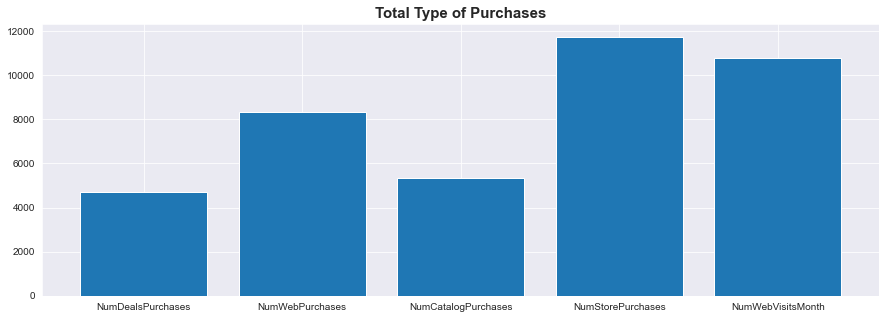

In [36]:
fig = plt.figure(figsize=(15,5))
plt.bar(x=purchasing, height=df[purchasing].sum())

plt.title("Total Type of Purchases", fontdict={'fontsize':15,'fontweight':'bold'})

plt.show()

While a lot of people are visiting the website for iFood, more purchases are being done in store than online. It seems like online campaigns with redemption in store might be a good tactic for future success.

Catalog Purchases are highly correlated with Campaign 1 and Campaign 5 over other Campaigns.

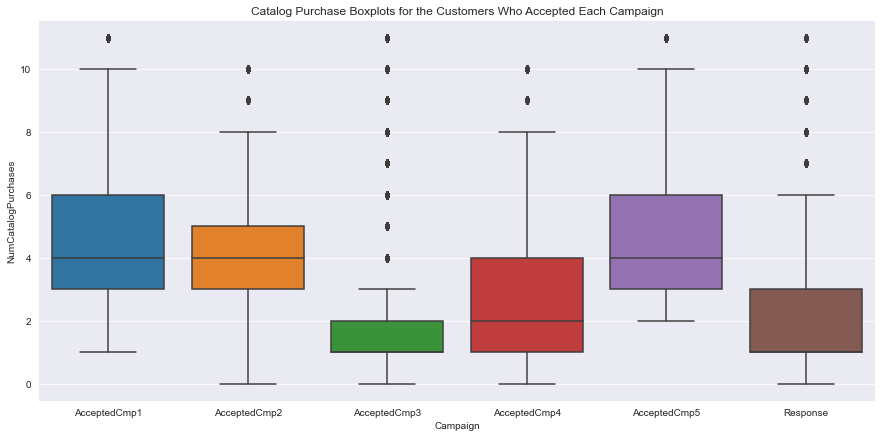

In [37]:
df_cat = pd.melt(df, id_vars=['NumCatalogPurchases'], value_vars=campaign, var_name='Campaign', value_name = 'Acceptance')

accepted_cmp_df_cat = df_cat[df_cat['Acceptance']==1]
df_cat_buys = df_cat[['NumCatalogPurchases']]

cmp_v_cat = accepted_cmp_df_cat.merge(df_cat_buys, how='inner', left_on='NumCatalogPurchases', right_on='NumCatalogPurchases').sort_values('Campaign')

plt.figure(figsize=(15,7))
sns.boxplot(x='Campaign', y='NumCatalogPurchases', data=cmp_v_cat)
plt.title("Catalog Purchase Boxplots for the Customers Who Accepted Each Campaign")
plt.show()

We can see some similarities between the IQR of Campaign 1 and Campaign 5 for Catalog purchases.

MntWines is highly correlated to campaign 1, 4 and 5.

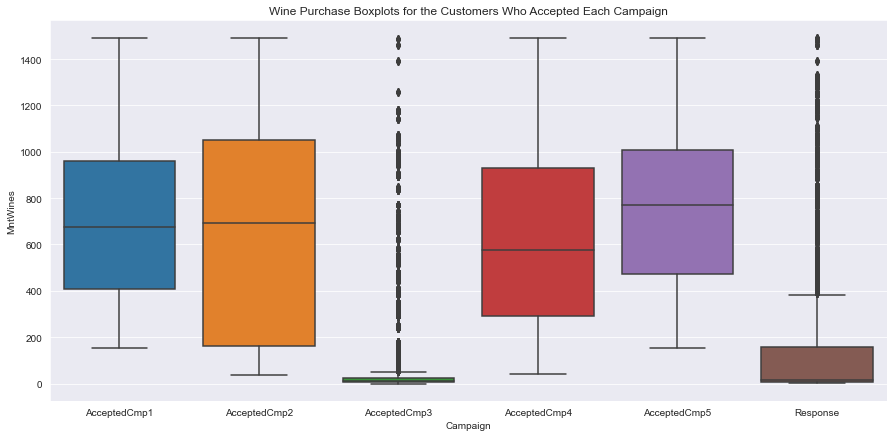

In [38]:
df4 = pd.melt(df, id_vars=['MntWines'], value_vars=campaign, var_name='Campaign', value_name = 'Acceptance')

accepted_cmp_df_wines = df4[df4['Acceptance']==1]
df_wines = df4[['MntWines']]

cmp_v_wines = accepted_cmp_df_wines.merge(df_wines, how='inner', left_on='MntWines', right_on='MntWines').sort_values('Campaign')

plt.figure(figsize=(15,7))
sns.boxplot(x='Campaign', y='MntWines', data=cmp_v_wines)
plt.title("Wine Purchase Boxplots for the Customers Who Accepted Each Campaign")
plt.show()

MntMeatProducts is higly correlated to both Campaign 1, 5 and 6.

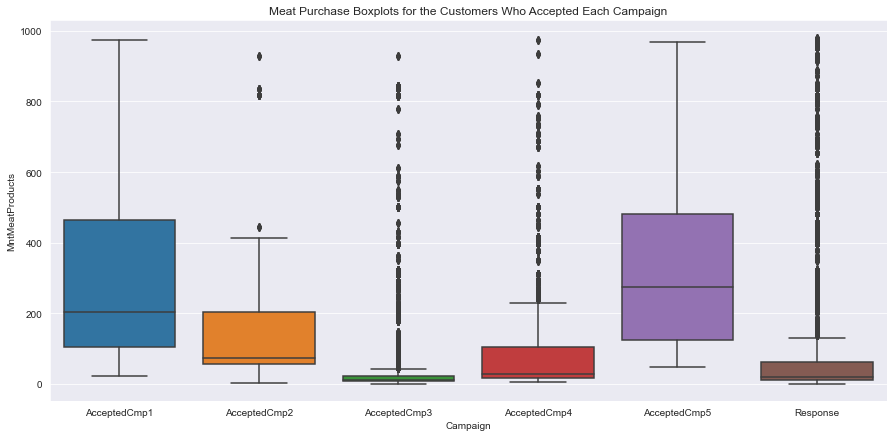

In [76]:
df5 = pd.melt(df, id_vars=['MntMeatProducts'], value_vars=campaign, var_name='Campaign', value_name = 'Acceptance')

accepted_cmp_df_meat = df5[df5['Acceptance']==1]
df_meat = df5[['MntMeatProducts']]

cmp_v_meat = accepted_cmp_df_meat.merge(df_meat, how='inner', left_on='MntMeatProducts', right_on='MntMeatProducts').sort_values('Campaign')

plt.figure(figsize=(15,7))
sns.boxplot(x='Campaign', y='MntMeatProducts', data=cmp_v_meat)
plt.title("Meat Purchase Boxplots for the Customers Who Accepted Each Campaign")
plt.show()

It seems as though Campaigns 1 and 5 were meat drivin products compared to Campaign 6 based off of correlation and the divergance of overall Meat purchases between the two boxplots.

In [81]:
df['Customer_Days'].describe()

count    2021.000000
mean     2511.613063
std       202.546762
min      2159.000000
25%      2337.000000
50%      2511.000000
75%      2688.000000
max      2858.000000
Name: Customer_Days, dtype: float64

#### The CMO of iFood asked for help discovering how future campaigns can be more effective. Below are a few data driven solutions.

## Conclusion

### Exploratory and statistacal results with recommendations:

** First we dug in to the relationship between Marital Status and Education with purchasing habits.
* Focusing on Single customers and customers with a PhD for Campaign 6 would have boosted the campaign from 15% to over 20%.
* On a large enough scale with enough clients that meet the mark, targeting Single customers with PhDs would result in a 30% acceptance rate for products similar to what was offered in Campaign 6.

** Next we looked at Total Youths at Home, how their spending varies and how it might correlate with Campaign acceptance.
* Almost 50% of our customers have only 1 child at home, but the median of products purchased for customers with 0 children at home is 3x that of homes with 1 child.
* Homes with dependants are looking more for deals to make purchases than clients with zero dependants. 
* Yet Acceptance rates of campaigns are higher among customers with 0 dependants.
* I think iFood campaigns that target 0 dependant households don't need to be a deal. Campaigns targeting families with 1-3 dependants  should focus on better deals geared towards families that can be accessed through website visits (redeamable in store or online).
* If campaign 1 focused on households with 0 youth at home the accptance rate would have jumped from 6.5% to 17.5%. Campaign 5 would have jumped from 7.2% to 21%. Campaign 6 would have risen from 15% to 27%.

** Lastly we looked at correlation factors through the heatmap.

««Income
* Income has a high correlation to Campaign5 and Campaign1.
* Future campaigns similar to campaign 1 and 5 should focus on their combined income IQR between 73,000 and 90,000. 

««Catalog Purchases
* The sweet spot for targeting Catalog Purchases for future Campaigns similar to Campaign 1 and 5 is between 3 to 5 catalog purchases.

««MntWines
* Future campaigns similar to Campaigns 1, 4 and 5 should focus on customer Wine ordering IQR between 400 and 1,000. 

««MntMeatProducts
* Future campaigns similar to Campaigns 1 and 5 should focus on customer Meat ordering IQR between 150 and 450.

«« Customer Days
* I think it important to note for the amount of product purchases that this dataframe IQR of customer days is in between 2337 and 2668 with a mean of 2511.  For future explorations of purchasing behavior this time frame might be useful to measure against.

### In Summation
* Utilizing the correlation boxplots and the Marital Status/Education acceptance correlation will give future campaign a much more targeted and successful result.  With these analyses taken into account our initial goal of creating future campaigns with 20% profitability is in reach.